## Image Data Practice

Sample script for generating image data for RF DN sample size experiment

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
black = np.zeros([5,5,3])

red = np.zeros([5,5,3])
red[:,:,0] = 0.9

green = np.zeros([5,5,3])
green[:,:,1] = 0.9

blue = np.zeros([5,5,3])
blue[:,:,2] = 0.9

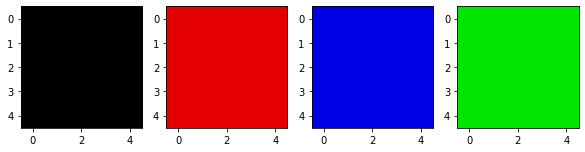

In [3]:
plt.figure(figsize = (10,5))
plt.subplot(1,4,1)
plt.imshow(black)
plt.subplot(1,4,2)
plt.imshow(red)
plt.subplot(1,4,3)
plt.imshow(blue)
plt.subplot(1,4,4)
plt.imshow(green)

## Generating Lines through Multivariate Gaussian Distribution

In [4]:
mu = [20, 25, 30, 25, 20]
cov = np.identity(len(mu))*1
X1 = np.random.multivariate_normal(mu, cov, [5,3])
X1 = X1 / np.amax(X1)
X1 = np.reshape(X1.T, [5,5,3])

mu = (list(range(20,32,2))+list(range(28,18,-2)))
cov = np.identity(len(mu))*1
X2 = np.random.multivariate_normal(mu, cov, [len(mu),3])
X2 = X2 / np.amax(X2)
X2 = np.reshape(X2.T, [len(mu),len(mu),3])

mu = np.concatenate([np.arange(20,30, 0.1), np.arange(30,20, -0.1)], axis = None)
cov = np.identity(len(mu))*1
X3 = np.random.multivariate_normal(mu, cov, [len(mu),3])
X3 = X3 / np.amax(X3)
X3 = np.reshape(X3.T, [len(mu),len(mu),3])

In [5]:
X1.shape

(5, 5, 3)

Text(0.5, 1.0, 'Vertical Gaussian 200 x 200 pixels')

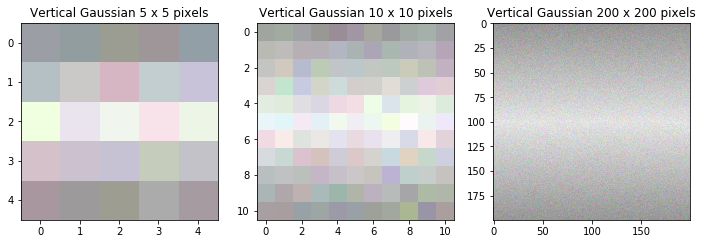

In [6]:
plt.figure(figsize = (12,12))
plt.subplot(1,3,1)
plt.imshow(X1)
plt.title('Vertical Gaussian 5 x 5 pixels')

plt.subplot(1,3,2)
plt.imshow(X2)
plt.title('Vertical Gaussian 10 x 10 pixels')

plt.subplot(1,3,3)
plt.imshow(X3)
plt.title('Vertical Gaussian 200 x 200 pixels')

In [7]:
Y1 = np.transpose(X1, (1,0,2))
Y2 = np.transpose(X2, (1,0,2))
Y3 = np.transpose(X3, (1,0,2))

Text(0.5, 1.0, 'Horizontal Gaussian 200 x 200 pixels')

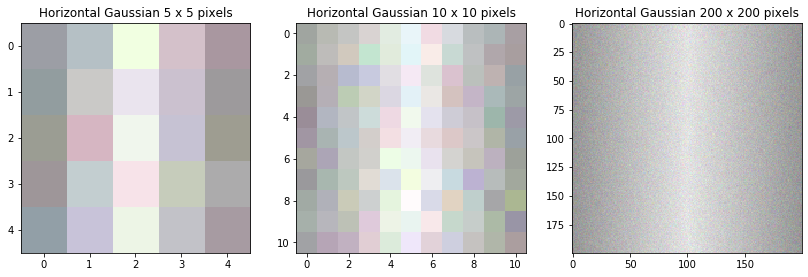

In [8]:
plt.figure(figsize = (14,6))
plt.subplot(1,3,1)
plt.imshow(Y1)
plt.title('Horizontal Gaussian 5 x 5 pixels')

plt.subplot(1,3,2)
plt.imshow(Y2)
plt.title('Horizontal Gaussian 10 x 10 pixels')

plt.subplot(1,3,3)
plt.imshow(Y3)
plt.title('Horizontal Gaussian 200 x 200 pixels')

Text(0.5, 1.0, 'Cross Gaussian 200 x 200 pixels')

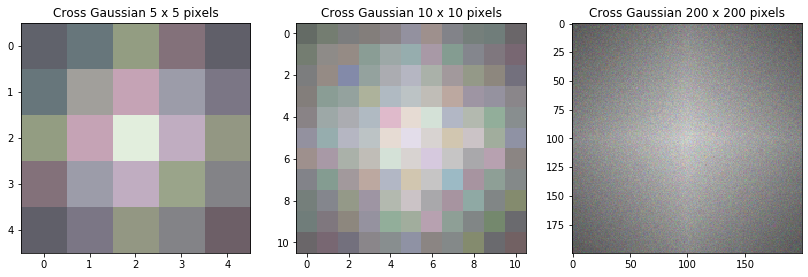

In [9]:
plt.figure(figsize = (14,6))
plt.subplot(1,3,1)
plt.imshow(X1*Y1)
plt.title('Cross Gaussian 5 x 5 pixels')

plt.subplot(1,3,2)
plt.imshow(X2*Y2)
plt.title('Cross Gaussian 10 x 10 pixels')

plt.subplot(1,3,3)
plt.imshow(X3*Y3)
plt.title('Cross Gaussian 200 x 200 pixels')

## Generating Greyscale Images

Text(0.5, 1.0, 'product')

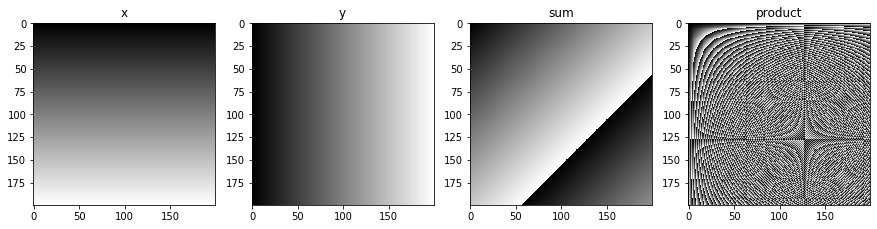

In [26]:
from PIL import Image

v_fade = np.zeros([200, 200], dtype=np.uint8)
for x in range(v_fade.shape[0]):
    for y in range(v_fade.shape[1]):
        v_fade[x][y] = x
h_fade = np.zeros([200, 200], dtype=np.uint8)
for x in range(h_fade.shape[0]):
    for y in range(h_fade.shape[1]):
        h_fade[x][y] = y
s = np.zeros([200, 200], dtype=np.uint8)
for x in range(s.shape[0]):
    for y in range(s.shape[1]):
        s[x][y] = y+x
mult = np.zeros([200, 200], dtype=np.uint8)
for x in range(mult.shape[0]):
    for y in range(mult.shape[1]):
        mult[x][y] = y*x
        
plt.figure(figsize = (15,6))
plt.subplot(1,4,1)
plt.imshow(v_fade, cmap='gray')
plt.title('x')
plt.subplot(1,4,2)
plt.imshow(h_fade, cmap='gray')
plt.title('y')
plt.subplot(1,4,3)
plt.imshow(s, cmap='gray')
plt.title('sum')
plt.subplot(1,4,4)
plt.imshow(mult, cmap='gray')
plt.title('product')

## Run CNN on Horizontal vs. Vertical Images

In [12]:
data = []

for _ in range(1000):
    mu = (list(range(20,32,1))+list(range(28,18,-1)))
    cov = np.identity(len(mu))*1
    X2 = np.random.multivariate_normal(mu, cov, [len(mu),3])
    X2 = X2 / np.amax(X2)
    X2 = np.reshape(X2.T, [len(mu),len(mu),3])
    data.append(X2)
    
for _ in range(1000):
    mu = (list(range(20,32,1))+list(range(28,18,-1)))
    cov = np.identity(len(mu))*1
    X2 = np.random.multivariate_normal(mu, cov, [len(mu),3])
    X2 = X2 / np.amax(X2)
    X2 = np.reshape(X2.T, [len(mu),len(mu),3])
    data.append(np.transpose(X2, (1,0,2)))
    
labels = np.concatenate((np.zeros(1000), np.ones(1000)), axis=None)
data = np.asarray(data)

In [13]:
import random
inds = [i for i in range(2000)]
random.shuffle(inds)

In [14]:
data = data[tuple([inds])]
labels = labels[inds]

In [15]:
from sample_size_experiment import *

In [18]:
model = parametric_convolutional_neural_network(X_train = data,
                                       y_train = labels,
                                       complexity = 3,
                                       epochs = 10,
                                       batch_size = 8,
                                       learning_rate = 0.001,
                                       validation_split = 0.3,
                                       verbose = 1
                                       )

Epoch 1/10
175/175 [==============================] - 1s 5ms/step - loss: 0.2169 - accuracy: 0.8821 - val_loss: 1.5746e-04 - val_accuracy: 1.0000
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 1.0864e-04 - accuracy: 1.0000 - val_loss: 7.2438e-05 - val_accuracy: 1.0000
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 5.3889e-05 - accuracy: 1.0000 - val_loss: 3.9244e-05 - val_accuracy: 1.0000
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 3.1464e-05 - accuracy: 1.0000 - val_loss: 2.4527e-05 - val_accuracy: 1.0000
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 2.0350e-05 - accuracy: 1.0000 - val_loss: 1.6470e-05 - val_accuracy: 1.0000
Epoch 6/10
175/175 [==============================] - 1s 5ms/step - loss: 1.4199e-05 - accuracy: 1.0000 - val_loss: 1.1856e-05 - val_accuracy: 1.0000
Epoch 7/10
175/175 [==============================] - 1s 5ms/step - loss: 1.0378e-05 - accuracy: 1.0000 

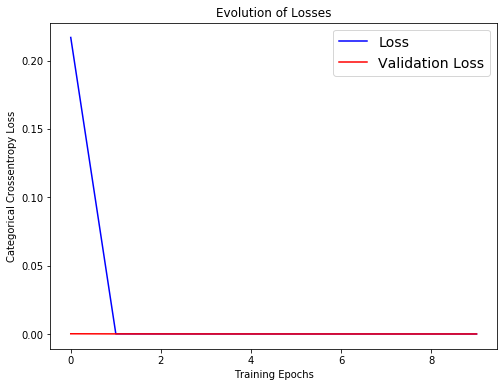

In [27]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

fig = plt.figure(figsize = (8,6))
plt.plot(losses[['loss','val_loss']]['loss'], c = 'blue')
plt.plot(losses[['loss','val_loss']]['val_loss'], c = 'red')
plt.ylabel('Categorical Crossentropy Loss')
plt.xlabel('Training Epochs')
plt.title('Evolution of Losses')
plt.legend(['Loss','Validation Loss'], loc = 'upper right', fontsize = 14)


## Can we Randomly Generate Images with n Blobs?

Idea: multiclass classification problem where each class is the number of 'blobs' generated in image permuted by Gaussian noise

In [83]:
from sklearn.datasets import make_blobs

In [84]:
n = 30
centers = 3
x = make_blobs(n_samples = n, n_features = 30, centers = centers, cluster_std = 10, center_box = (0,255), random_state = None)

In [85]:
x = x[0]
x.shape

(30, 30)

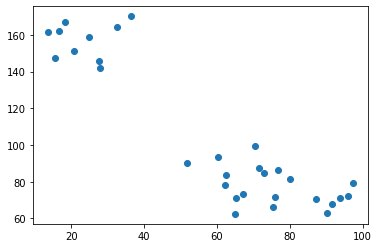

In [86]:
plt.scatter(x[:,0],x[:,1])

In [87]:
x = np.concatenate((np.concatenate((x, x)),x))
print(x.shape)

(90, 30)


In [88]:
x = x.reshape(30,30,3)
x.astype('uint8')

array([[[ 91,  67,  82],
        [154, 100, 216],
        [  9, 104,  80],
        ...,
        [221, 101, 208],
        [188, 216,  78],
        [192, 196,  47]],

       [[ 62,  83,  65],
        [214, 185,  50],
        [178,   6, 199],
        ...,
        [224, 119, 181],
        [176, 228,  70],
        [210, 207,  28]],

       [[ 62,  78,  95],
        [134,  81, 196],
        [ 18, 117,  78],
        ...,
        [ 65, 105, 136],
        [242,  80, 124],
        [110, 247,  73]],

       ...,

       [[ 60,  93,  45],
        [235, 187,  69],
        [184,  29, 213],
        ...,
        [ 50, 100, 124],
        [244,  84, 113],
        [ 95, 249,  65]],

       [[ 70,  99,  59],
        [224, 193,  53],
        [183,  17, 206],
        ...,
        [141, 202,  24],
        [176,  78,  35],
        [103, 240,  74]],

       [[ 32, 164, 127],
        [202,  38,  58],
        [150,  84, 215],
        ...,
        [136, 200,  27],
        [175,  66,  18],
        [106, 236,  65]]

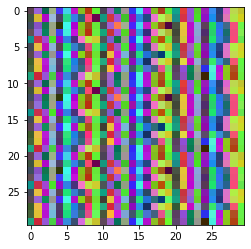

In [89]:
plt.imshow(x.astype('uint8'))